# 3.5 图像梯度与边缘检测

## 3.5.1 图像梯度-Sobel算子

![title](sobel.png)

In [2]:
import cv2  #opencv 读取进来为BGR格式
import matplotlib.pyplot as plt
import numpy as np

#一个魔法指令，不需要采用plt.show()显示图像
%matplotlib inline   

In [3]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
img = cv2.imread('images/gradients.jpg',cv2.IMREAD_GRAYSCALE)

cv_show('img',img)

dst = cv2.Sobel(src,ddepth,dx,dy,ksize)
- ddepth:图像的深度
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小

[[   0. -376. -222. ...   18.    4.    0.]
 [   0. -243. -176. ...   17.    1.    0.]
 [   0.  -55. -191. ...    8.    5.    0.]
 ...
 [   0.   -7.   -2. ...    6.   -4.    0.]
 [   0.   -6.   -5. ...   -1.  -18.    0.]
 [   0.   -6.  -10. ...   -6.  -26.    0.]]


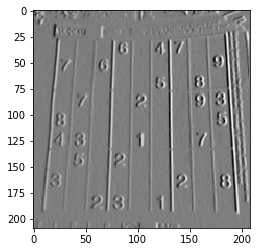

In [13]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)

#print(sobelx)
#cv_show('sobelx',sobelx)
plt.imshow(sobelx,cmap = 'gray')
plt.show()


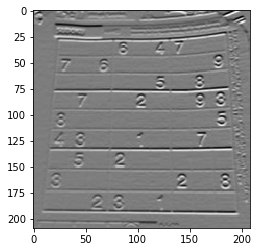

In [12]:
sobely= cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
plt.imshow(sobely,cmap = 'gray')
#plt.imshow(sobely)
plt.show()

In [14]:
img = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)

cv_show('img',img)

In [16]:
img = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)

sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)

sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show('sobelxy',sobelxy)

In [18]:
img = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)

cv_show('sobelxy2',sobelxy)

![title](laplace.png)

In [20]:
#不同算子的差异
img = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)


scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

laplacian  = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy, scharrxy, laplacian))
cv_show('res',res)

## 3.5.2 边缘检测-canny算子

- 1）使用高斯滤波器，以平滑图像，滤波噪声。
- 2）计算图像中每个像素点的梯度强度和方向
- 3）应用非极大值(Non-Maximum Suppression)抑制
- 4）应用双阈值(Double-Threshold)检测来确定真实的和潜在的边缘
- 5）通过抑制孤立的弱边缘最终完成边缘检测

![title](canny/canny_1.png)
![title](canny/canny_2.png)
![title](canny/canny_3.png)
![title](canny/canny_4.png)
![title](canny/canny_5.png)
![title](canny/canny_6.png)

In [4]:
img = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img, 80, 150)
v2 = cv2.Canny(img, 50, 100)

res2 = np.hstack((v1,v2))

cv_show('res',res2)

In [8]:
img = cv2.imread('images/bi.jpg',cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img, 80, 150)
v2 = cv2.Canny(img, 50, 100)

res2 = np.hstack((v1,v2))

cv_show('res',res2)